# Data Exploration Sandbox

This is a temporary file. It is for some quick data exploration and graphing.

In [1]:
suppressPackageStartupMessages(
    {suppressWarnings({
        library(tidyverse)
        library(repr)
        library(tidymodels)
        library(tidyr)
        library(ggplot2)        
        library(scales)
        library(patchwork) 
    })
})

In [2]:
options(repr.plot.width = 9, repr.plot.height = 7, repr.matrix.max.rows = 7,readr.show_col_types = FALSE)

player_data <- read_csv("https://raw.githubusercontent.com/FabianoGLentini/player-subscription-ml/refs/heads/main/data/players.csv")


In [3]:
# Wrangle fist pass
player_df <- player_data |> # TODO must consider reworking a joining of some labels in gender etc due to low representaions
            select( subscribe, gender, played_hours, experience, Age) |>
            drop_na() |>
            mutate(
                subscribe = as_factor(subscribe),  # lgl -> fct for analysis and modeling
                gender = as_factor(gender),        # chr -> fct for analysis and modeling
                played = factor(as.logical(played_hours)),
                experience = as_factor(experience) # chr -> fct for analysis and modeling
            ) |>
                 mutate(gender = fct_recode(gender,
                                    "Non-binary/Other" = "Agender",
                                    "Non-binary/Other" = "Non-binary",
                                     "Non-binary/Other" = "Two-Spirited",
                                    "Non-binary/Other" = "Other"
                                      ))

# player_df
# test_ag <- player_df |>
#             group_by(gender) |>
#             select(gender) |>
#             mutate(gender = fct_recode(gender,
#                                     "Non-binary/Other" = "Agender",
#                                     "Non-binary/Other" = "Non-binary",
#                                      "Non-binary/Other" = "Two-Spirited",
#                                       ))

# test_ag


Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `gender = fct_recode(...)`.
Caused by warning:
! Unknown levels in `f`: Other”


gender,n
<fct>,<int>
Male,124
Female,37
Non-binary/Other,22
Prefer not to say,11


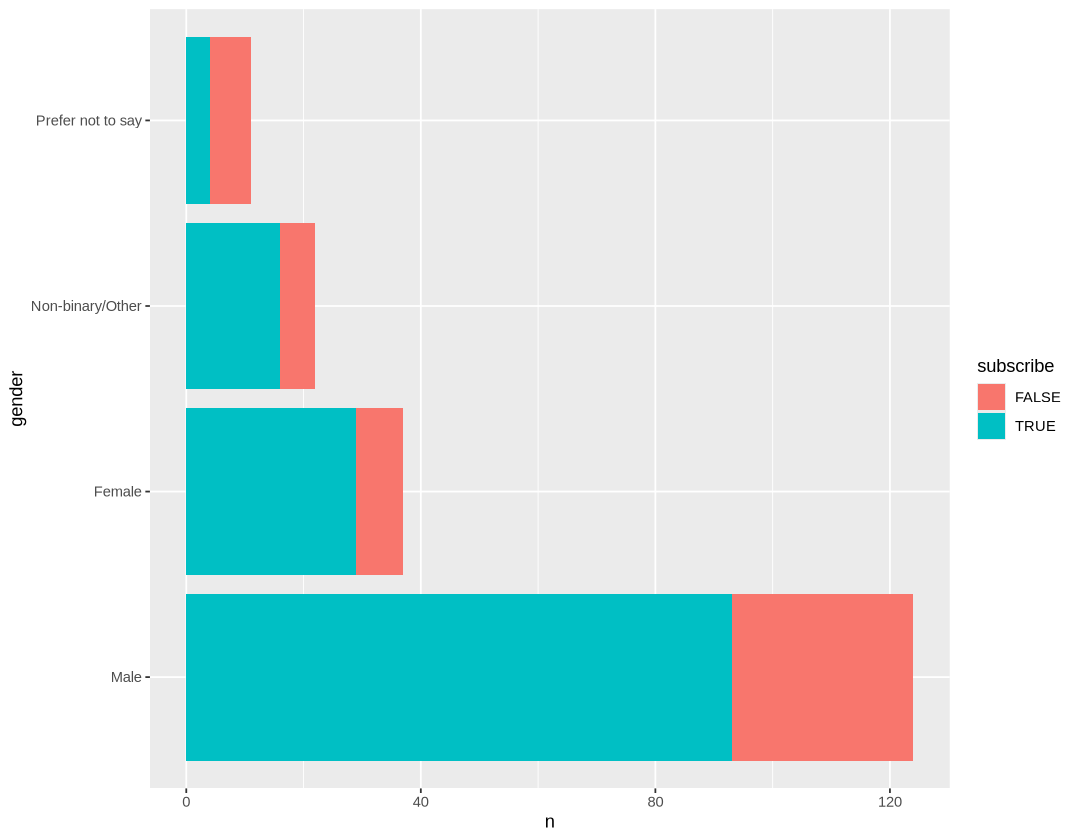

In [4]:
# RAW DATA summarize
count_sub_gen <- group_by(player_df, gender) |>
                    count(subscribe) |>
                    mutate(perc_sub = round( n / sum(n), 2))
gender_plot <- ggplot(count_sub_gen, aes(x = n, y = gender, fill = subscribe)) +
                    geom_bar(stat ="identity") 
                    
gender_plot
count_sub_gen <- group_by(player_df, gender) |>
                    count(gender)
count_sub_gen              


In [5]:
# Explore option to aggregate gender as Male, Female and non-binary
non_binary_group <- filter(count_sub_gen, gender != "Female", gender != "Male") |> 
                    mutate()


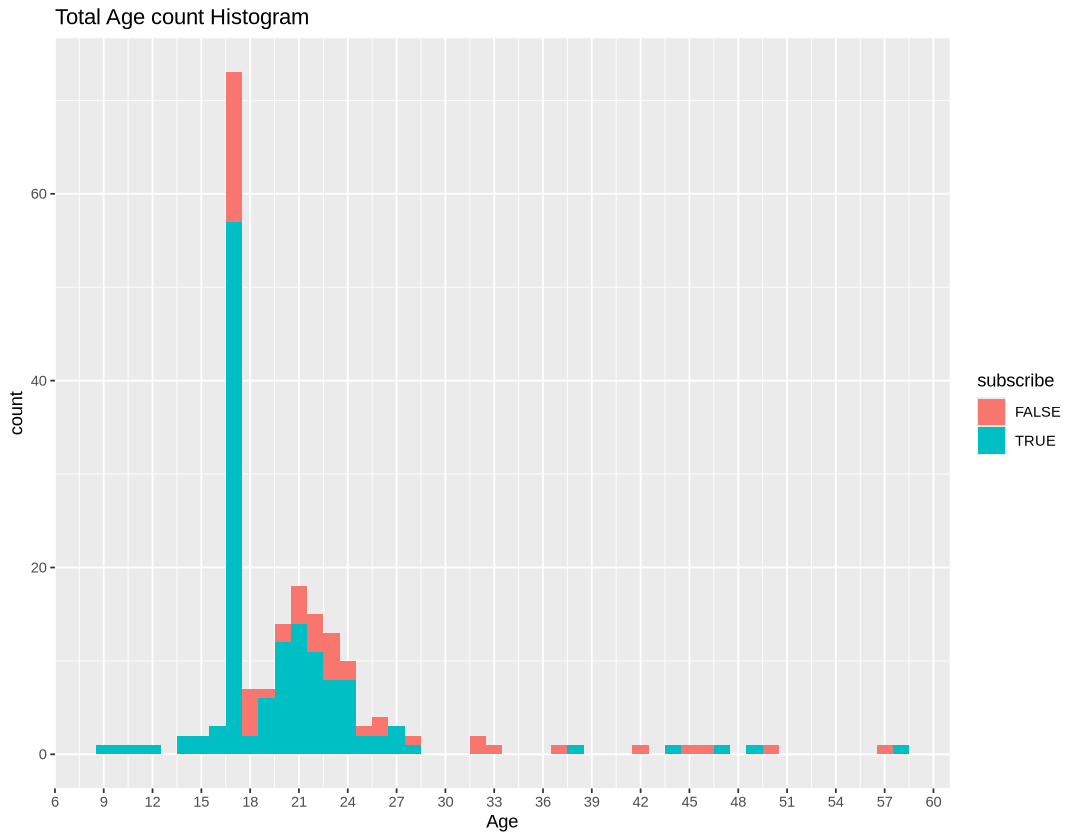

In [6]:
# VIEW AGES
# ALL AGES
histogram_age <- player_df |> 
            ggplot(aes(x = Age, fill = subscribe)) + 
            geom_histogram(binwidth = 1) +
            ggtitle("Total Age count Histogram") +
            scale_x_continuous(n.breaks = 20)
histogram_age


Warning message:
“Removed 18 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”


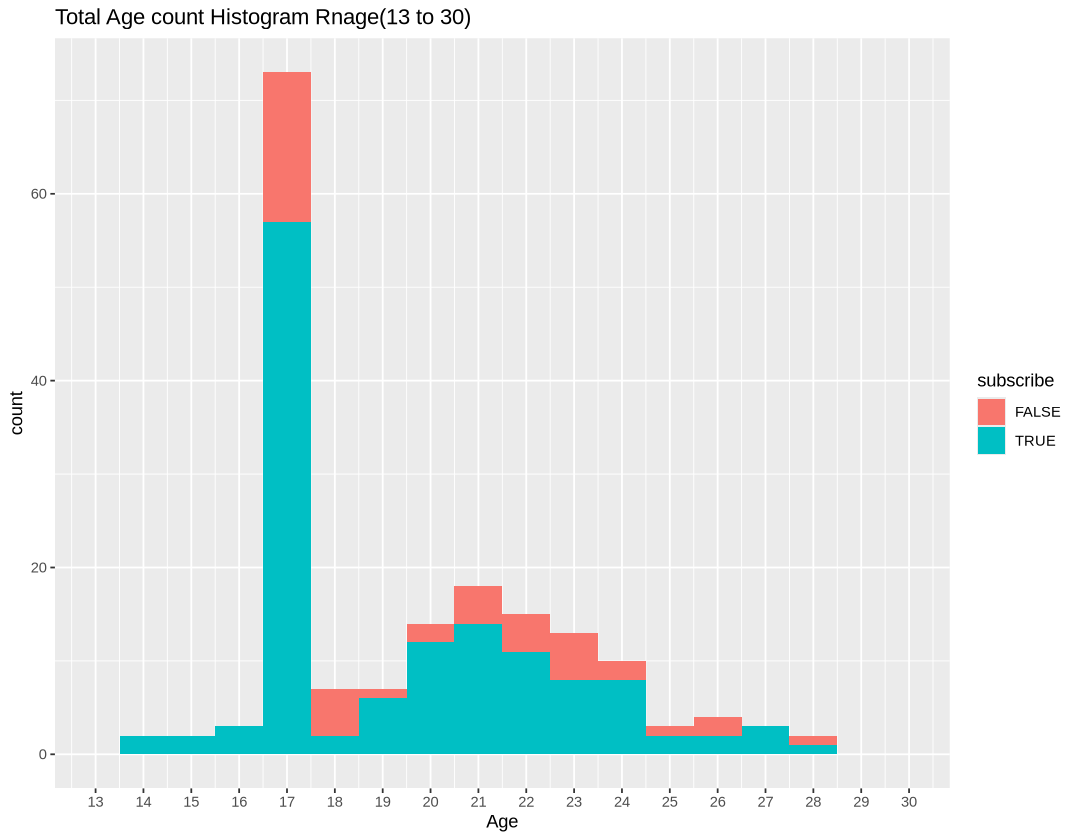

In [7]:
# Range from 13 to 30
histogram_age_ranged <- player_df |> 
            ggplot(aes(x = Age, fill = subscribe)) + 
            geom_histogram(binwidth = 1) +
            ggtitle("Total Age count Histogram Rnage(13 to 30)") +
            scale_x_continuous(n.breaks = 20, limits = c(13, 30))
histogram_age_ranged

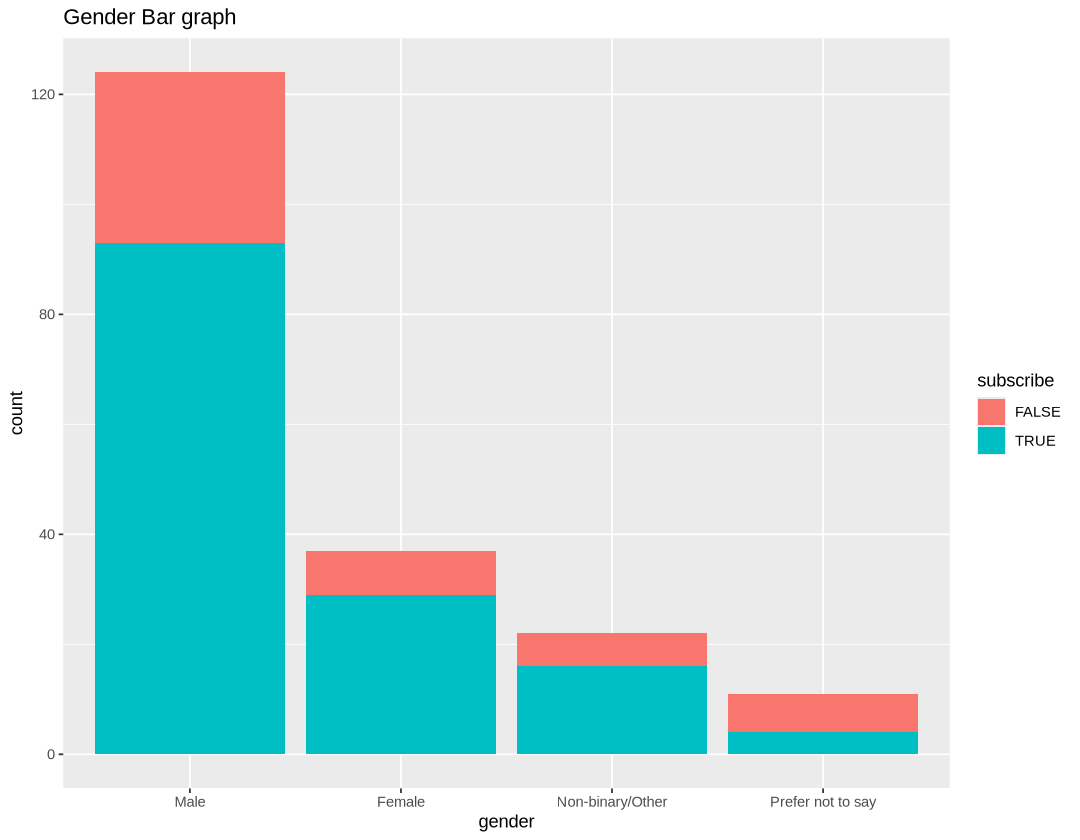

In [8]:
# VIEW GENDER 
bar_gender <- player_df |> 
            ggplot(aes(x = gender, fill = subscribe)) + 
            geom_bar() +
            ggtitle("Gender Bar graph")

bar_gender

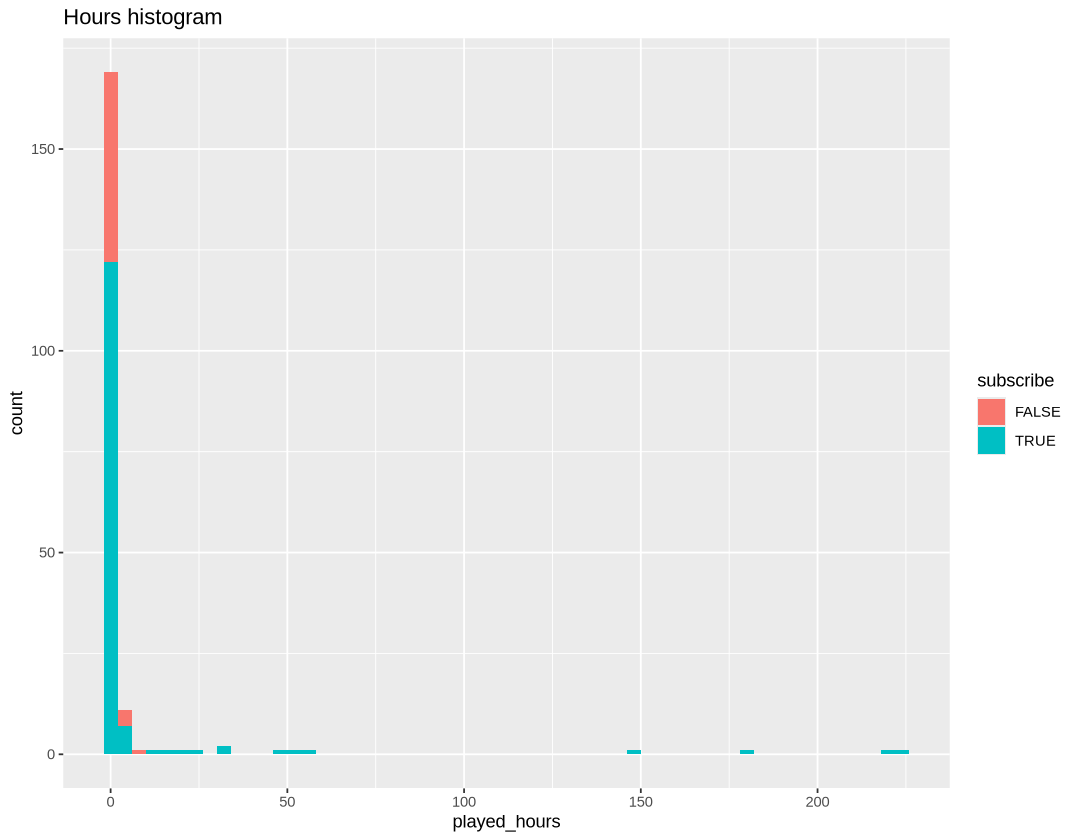

In [9]:
# VIEW HOURS
# ALL HOURS
histogram_hours <- player_df |> 
            ggplot(aes(x = played_hours, fill = subscribe)) + 
            geom_histogram(binwidth = 4) +
            ggtitle("Hours histogram") 
            # scale_x_continuous(n.breaks = 20, limits = c(13, 30))
histogram_hours

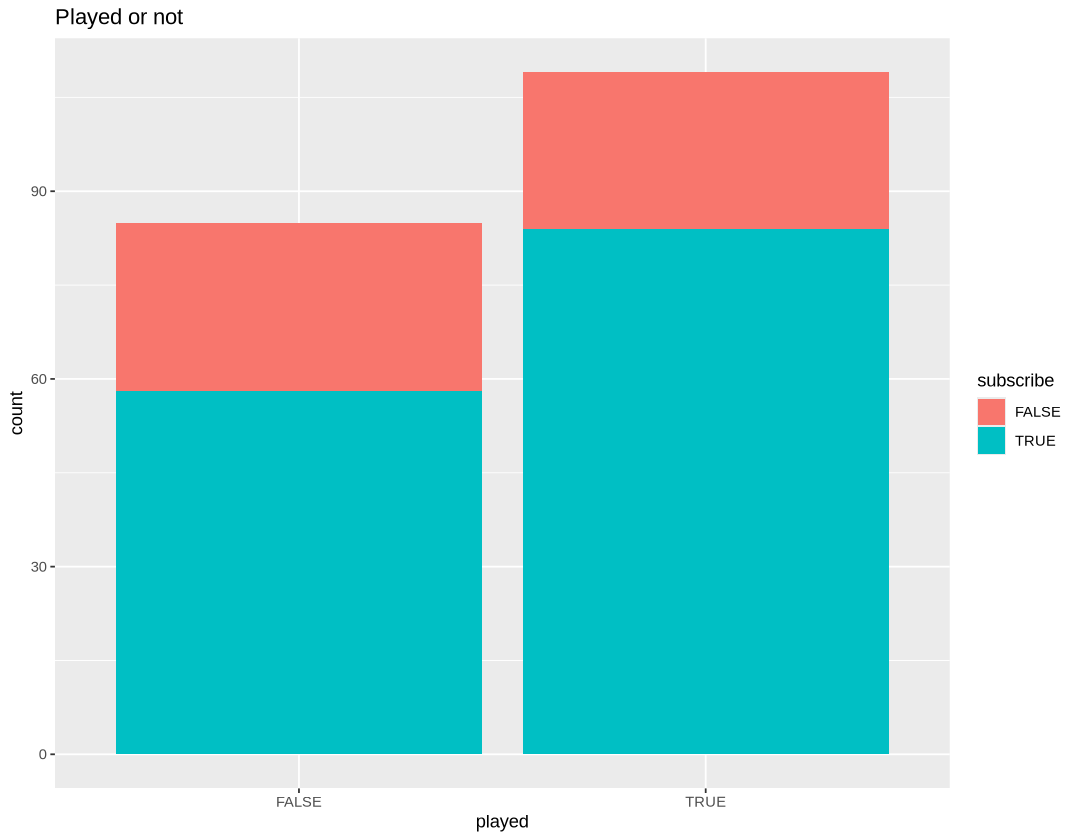

In [10]:
boolean_hours <- player_df |> 
            ggplot(aes(x = played, fill = subscribe)) + 
            geom_bar() +
            ggtitle("Played or not")
boolean_hours

Warning message:
“Removed 13 rows containing missing values or values outside the scale range
(`geom_point()`).”


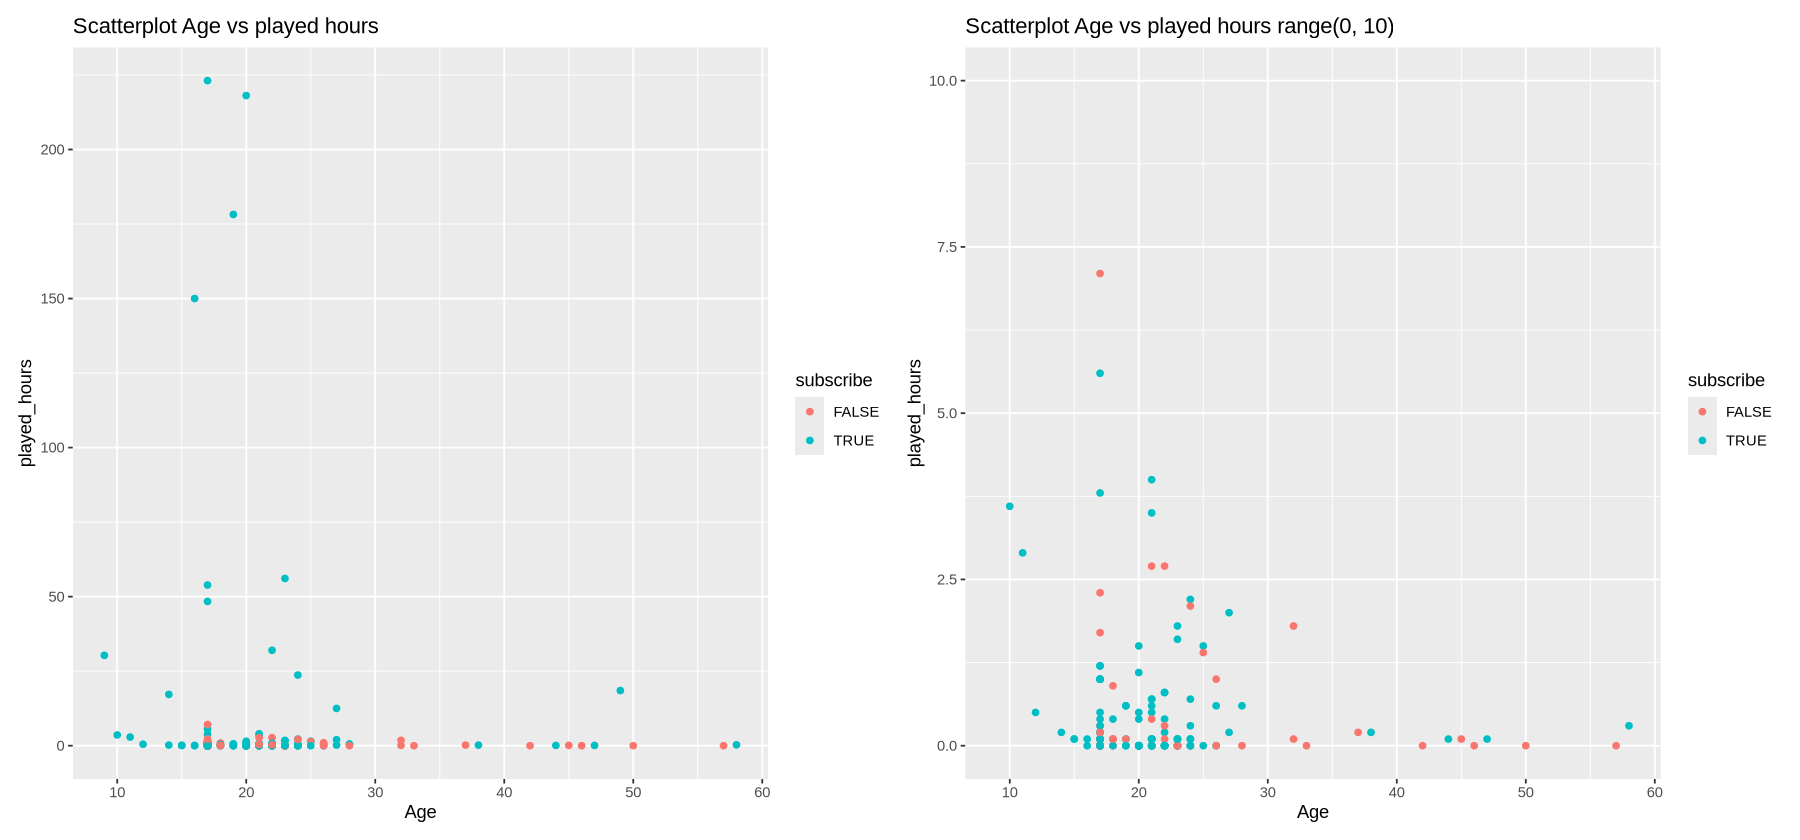

In [11]:
options(repr.plot.width = 15, repr.plot.height = 7, repr.matrix.max.rows = 7,readr.show_col_types = FALSE)

# SCATERPLOT Age Time played
scaterplot_AH <- player_df |> 
            ggplot(aes(x = Age, y = played_hours, colour = subscribe)) + 
            geom_point() +
            ggtitle("Scatterplot Age vs played hours")

scaterplot_AH_range <- player_df |> 
            ggplot(aes(x = Age, y = played_hours, colour = subscribe)) + 
            geom_point() +
            ggtitle("Scatterplot Age vs played hours range(0, 10)") + 
            ylim(c(0, 10))
scaterplot_AH + scaterplot_AH_range

In [12]:
?map

map {purrr},R Documentation
.x,A list or atomic vector.
.f,"A function, specified in one of the following ways: A named function, e.g. mean. An anonymous function, e.g. ⁠\(x) x + 1⁠ or function(x) x + 1. A formula, e.g. ~ .x + 1. You must use .x to refer to the first argument. Only recommended if you require backward compatibility with older versions of R. A string, integer, or list, e.g. ""idx"", 1, or list(""idx"", 1) which are shorthand for ⁠\(x) pluck(x, ""idx"")⁠, ⁠\(x) pluck(x, 1)⁠, and ⁠\(x) pluck(x, ""idx"", 1)⁠ respectively. Optionally supply .default to set a default value if the indexed element is NULL or does not exist."
...,"Additional arguments passed on to the mapped function. We now generally recommend against using ... to pass additional (constant) arguments to .f. Instead use a shorthand anonymous function: # Instead of x |> map(f, 1, 2, collapse = "","") # do: x |> map(\(x) f(x, 1, 2, collapse = "","")) This makes it easier to understand which arguments belong to which function and will tend to yield better error messages."
.progress,"Whether to show a progress bar. Use TRUE to turn on a basic progress bar, use a string to give it a name, or see progress_bars for more details."
.ptype,"If NULL, the default, the output type is the common type of the elements of the result. Otherwise, supply a ""prototype"" giving the desired type of output."
